## Lecture 20: Stochastic Gradient Descent

In the last lecture we have learned how to set up and use the softmax regression to classify all 10 handwritten digits based on pixel intensities on a 28x28 grid (MNIST dataset).

However, the training is slow on a decent configured laptop due to the size the dataset and the size of the parameter.

Today we will learn a new method called Stochastic Gradient Descent (SGD), one of the two pillars of the deep learning (the other being backpropagation).

> Every state-of-the-art Deep Learning library contains implementations of various algorithms to optimize (stochastic) gradient descent.

References:
* [Why Momentum Really Works](https://distill.pub/2017/momentum/)
* [An overview of gradient descent optimization algorithms](http://ruder.io/optimizing-gradient-descent/index.html#stochasticgradientdescent)

# Vanilla GD 
We consider a loss function (e.g., the one we saw in softmax regression) which is the average of the sample-wise loss:

$$L(\mathbf{w}) := L(\mathbf{w}; X,\mathbf{y}) = \frac{1}{N}\sum_{i=1}^N f_i(\mathbf{w}; \mathbf{x}^{(i)},y^{(i)})$$ 

which has the weights $\mathbf{w}$ as the parameters. Let me copy the softmax loss function here for comparison:

$$
L (\mathbf{w})  = - \frac{1}{N}\sum_{i=1}^N \left\{\sum_{k=1}^K
1_{\{y^{(i)} = k\}} \ln \Bigg( \frac{\exp(\mathbf{w}_k^{\top} \mathbf{x}^{(i)})}{\sum_{j=1}^{K} 
\exp\big(\mathbf{w}_j^{\top} \mathbf{x}^{(i)} \big) }  \Bigg)\right\}.
$$

Then the gradient descent method for it reads:

> Choose initial guess $\mathbf{w}_0$, step size (learning rate) $\eta$, number of iterations $M$<br><br>
>    For $k=0,1,2, \cdots, M$<br>
>    &nbsp;&nbsp;&nbsp;&nbsp;    $\displaystyle\mathbf{w}_{k+1} =  \mathbf{w}_k - \eta\nabla_{\mathbf{w}} L(\mathbf{w}_k) =  \mathbf{w}_k - \frac{\eta}{N}\sum_{i=1}^N \nabla f_i(\mathbf{w}; \mathbf{x}^{(i)},y^{(i)})$

The gradient has to be evaluated $N$ times in one iteration, each evaluation involves a matrix matrix multiplication of order $O(n)$ (number of features in one sample).

### Drawbacks: 
* Large amount of gradient evaluation, long computation time, wasting electricity, etc. 
* Suppose we add more examples to our training set. For simplicity, imagine we just add an extra copy of every training example (but the computer algorithm does not know it is the same samples): then the amount of work doubles!
$$
\nabla L = \frac{1}{2N}\sum_{i=1}^N \nabla f_i(\mathbf{w}) + \frac{1}{2N}\sum_{i=1}^N \nabla f_i(\mathbf{w}) ,
$$
even for the same loss function.
* The training examples arrive one-at-a-time (or several-at-a-time) as the model is learning (gradient descent). Should we include these into the original dataset and re-compute the gradient?

# Stochastic Gradient Descent

Suppose our loss function is still:

$$L := L(\mathbf{w}; X,\mathbf{y}) =  \frac{1}{N}\sum_{i=1}^N f_i(\mathbf{w}; \mathbf{x}^{(i)},y^{(i)}),$$

where $X = (\mathbf{x}^{(1)}, \dots, \mathbf{x}^{(N)})^{\top}$ are the training samples, $\mathbf{y} = (y^{(1)}, \dots, y^{(N)})^{\top}$ are the labels for the training samples.

> Choose initial guess $\mathbf{w}_0$, step size (learning rate) $\eta$, number of inner iterations $M$, number of epochs $n_E$ <br><br>
>    Set $\mathbf{w}_{M+1} = \mathbf{w}_0$ for epoch $e=0$<br>
>    For epoch $n=1,2, \cdots, n_E$<br>
>    &nbsp;&nbsp;&nbsp;&nbsp; $\mathbf{w}_{0}$ for the current epoch is $\mathbf{w}_{M+1}$ for the previous epoch.<br>
>    &nbsp;&nbsp;&nbsp;&nbsp; Randomly shuffle the training samples.<br>
>    &nbsp;&nbsp;&nbsp;&nbsp; For $m=0,1,2, \cdots, M$<br>
>    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    $\displaystyle\mathbf{w}_{m+1} = \mathbf{w}_m - \eta \nabla f_i(\mathbf{w}; \mathbf{x}^{(m)},y^{(m)})$

If $M = N$, which is the current batch of all training samples, one outer iteration is called a completed *epoch*.

### Vanilla SGD: Single gradient evaluation at each iteration

# Linear regression

Let us give it a go on the linear regression. This time, we are using `scikit-learn`'s built-in dataset. For the linear regression, we can use `scikit-learn`'s `LinearRegression()` class for the multivariate regression as Lecture 17, but since we are illustrating SGD, we are implementing ourselves. Recall the loss function with the $L^2$ regularization and the gradient: let the weight $\mathbf{w} = (w_0, \widehat{\mathbf{w}})$ where $w_0$ is the bias, and $\widehat{\mathbf{w}}$ is the vector containing the weights for the features of the dataset

$$
L(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N  
\left( [1, \;\mathbf{x}^{(i)}]^{\top} \mathbf{w} - y^{(i)} \right)^2 
+ \epsilon |\widehat{\mathbf{w}}|^2,
\\
\frac{\partial L(w)}{\partial \mathbf{w}} = \frac{2}{N}\sum_{i=1}^N [1, \;\mathbf{x}^{(i)}]\left( [1, \;\mathbf{x}^{(i)}]^{\top} \mathbf{w} - y^{(i)}\right) + 2\epsilon\, [0, \widehat{\mathbf{w}}]
$$

Reference: [Scikit-learn's dataset loading utilities](https://scikit-learn.org/stable/datasets/index.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# let us load the house price dataset 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# pre-process the data to have an artificial column of ones
X_train = np.concatenate((np.ones([len(y_train),1]), X_train), axis=1) 
# concatenating ones to the X_train as the first column (along axis 1)
X_test = np.concatenate((np.ones([len(y_test),1]), X_test), axis=1) 

In [4]:
w = 1e-2*np.random.normal(size=np.shape(X_train)[1]) # weights and bias

In [5]:
np.set_printoptions(suppress=True)
X_test[:4,:].dot(w)

array([-0.40346402, -0.66584146,  3.02636508, -1.5164259 ])

In [6]:
y_test[:4]

array([23.6, 32.4, 13.6, 22.8])

In [9]:
eps = 1e-3 # regularization parameter

# our model, returns the linear function [1 X]^T w
def f(w, X):
    # X is the training data
    return np.matmul(X,w)

# loss function = total square error on the given data set X,y
def loss(w, X, y):
    # N = len(y) 
    # this is one of the key, if y is only part of/one of the data label, then N will be small!
    residual_components = f(w, X) - y
    regularization = eps*np.sum(w[1:]**2)
#     return (1/len(y))*np.sum(residual_components**2) + regularization
    return np.mean(residual_components**2) + regularization
    # the second implementation is prefered due to the len(y) may not exist

def gradient_loss(w, X, y):
    # An alternative implementation
    #     N = len(y)
    #     loss_components = f(w, X) - y
    #     gradient = loss_components.reshape(-1,1)*X
    #     return (2/N)*np.sum(gradient, axis=0)
    gradient_for_all_training_data = (f(w,X) - y).reshape(-1,1)*X
    gradient_for_regularization = 2*eps*w
    gradient_for_regularization[0] = 0 # no gradient for the bias in the regularization term
    gradient_mean_training_data = np.mean(gradient_for_all_training_data, axis=0)
    # we should return a (14,) array, which is averaging all training data
    return 2*gradient_mean_training_data + gradient_for_regularization

# we define a cross validating function to compute the R^2 score 
def cross_validate_rsquared(w, X, y):
    y_pred = f(w, X)
    return 1 - (np.sum((y- y_pred)**2))/(np.sum((y- y.mean())**2))

In [ ]:
np.linalg.norm(gradient_loss(w,X_train,y_train))

In [ ]:
gradient_loss(w,X_train,y_train)

In [ ]:
np.sum(w * X_train, axis=1)[:10]

In [ ]:
np.matmul(X_train,w)[:10]

## First let us try gradient descent 
#### just making sure our implementation above is good...

In [10]:
eta = 1e-6# step size (learning rate)
num_steps = 2000
w = np.array([30.24675099,  -0.11305592,   0.03011046,   0.04038072, 2.7844382 , -17.20263339,   4.4388352 ,  
              -0.00629636,  -1.44786537,   0.26242974,  -0.01064679,  -0.91545624, 0.01235133,  -0.50857142]) 
w += 2e-1*np.random.normal(size=np.shape(X_train)[1])  

loss_at_eachstep = np.zeros(num_steps) # record the change of the loss function
for i in range(num_steps):
    loss_at_eachstep[i] = loss(w,X_train,y_train)
    dw = gradient_loss(w,X_train,y_train)
    w = w - eta * dw
    if i % 200 == 0:
        print("loss after", i+1, "iterations is: ", loss(w,X_train,y_train))
        print("Training R squared after", i+1, "iterations is: ", cross_validate_rsquared(w, X_train, y_train))
        print("Test R squared after", i+1, "iterations is: ", cross_validate_rsquared(w, X_test, y_test))
    # keep track of training accuracy just making sure we are in the right direction

loss after 1 iterations is:  235.30410418233268
Training R squared after 1 iterations is:  -1.7047283584087864
Test R squared after 1 iterations is:  -2.595424984951314
loss after 201 iterations is:  62.56955143211891
Training R squared after 201 iterations is:  0.2836190856907608
Test R squared after 201 iterations is:  -0.05892460015169432
loss after 401 iterations is:  54.3828539469413
Training R squared after 401 iterations is:  0.3778557898418847
Test R squared after 401 iterations is:  0.08769920921402519
loss after 601 iterations is:  48.53129036773873
Training R squared after 601 iterations is:  0.4452128167164361
Test R squared after 601 iterations is:  0.19581970994988163
loss after 801 iterations is:  44.2148013433231
Training R squared after 801 iterations is:  0.4948996366943851
Test R squared after 801 iterations is:  0.2776268901518544
loss after 1001 iterations is:  40.951216663932264
Training R squared after 1001 iterations is:  0.5324665024292754
Test R squared after 

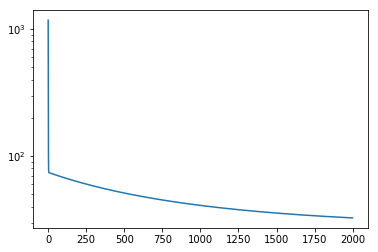

In [11]:
plt.plot(range(num_steps), loss_at_eachstep)
plt.yscale('log')
plt.show()

## Scikit-learn's version

In [12]:
from sklearn import linear_model
# housing_reg = linear_model.LinearRegression()
housing_reg = linear_model.Ridge(alpha=1e-3)
housing_reg.fit(X_train, y_train)
print("Training R squared is:", housing_reg.score(X_train,y_train))
print("Test R squared is:", housing_reg.score(X_test,y_test))

Training R squared is: 0.7508837718540138
Test R squared is: 0.6684818297725222


### testing if our functions are implemented correctly

In [ ]:
w = housing_reg.coef_
w[0] = housing_reg.intercept_
loss(w,X_test,y_test)
# gradient_loss(w,X_train,y_train)

# Stochastic gradient descent

In [28]:
test = np.random.permutation(5)
test

array([4, 1, 3, 0, 2])

In [29]:
np.random.shuffle(test)
test

array([3, 0, 4, 1, 2])

In [31]:
shuffled_index = np.random.permutation(5)
for i in range(5):
    print(shuffled_index[i])

4
0
1
2
3


In [32]:
eta = 1e-6# step size (learning rate)
num_epochs = 300
M = len(y_train)
N = M # in general you can choose M <= N
w = np.array([30.24675099,  -0.11305592,   0.03011046,   0.04038072, 2.7844382 , -17.20263339,   4.4388352 ,  
              -0.00629636,  -1.44786537,   0.26242974,  -0.01064679,  -0.91545624, 0.01235133,  -0.50857142]) 
w += 2e-1*np.random.normal(size=np.shape(X_train)[1])  

sgd_loss_at_eachstep = np.zeros([num_epochs,N]) # record the change of the loss function
# num_epochs is the # of outer iterations
# N is the # of samples, which is the number of inner iterations

for e in range(num_epochs):
    shuffle_index = np.random.permutation(N)
    for m in range(M):
        i = shuffle_index[m] # i corresponds i-th sample
        sgd_loss_at_eachstep[e,m] = loss(w,X_train,y_train)
        dw = gradient_loss(w,X_train[i,:],y_train[i])
        # this is the gradient for i-th sample
        w = w - eta * dw
        if m % 100 ==0 and e % 100 == 0:
            print("loss after", e+1, "epochs and ", m+1, "iterations is: ", loss(w,X_train,y_train))
            print("Training R squared after", e+1, "epochs and ", m+1, 
                  "iterations is:", cross_validate_rsquared(w, X_train, y_train))
            print("Testing R squared after", e+1, "epochs and ", m+1, 
                  "iterations is:", cross_validate_rsquared(w, X_test, y_test))

loss after 1 epochs and  1 iterations is:  2717.855630074267
Training R squared after 1 epochs and  1 iterations is: -30.28142966397839
Testing R squared after 1 epochs and  1 iterations is: -40.50216749543227
loss after 1 epochs and  101 iterations is:  54.75383144395124
Training R squared after 1 epochs and  101 iterations is: 0.3735412387753251
Testing R squared after 1 epochs and  101 iterations is: 0.28677551270425095
loss after 1 epochs and  201 iterations is:  40.272614062712066
Training R squared after 1 epochs and  201 iterations is: 0.5402344940668596
Testing R squared after 1 epochs and  201 iterations is: 0.5579541042457001
loss after 1 epochs and  301 iterations is:  37.348188553469484
Training R squared after 1 epochs and  301 iterations is: 0.5738974994333711
Testing R squared after 1 epochs and  301 iterations is: 0.6141479948091135
loss after 1 epochs and  401 iterations is:  49.70017936980269
Training R squared after 1 epochs and  401 iterations is: 0.4317136682995451

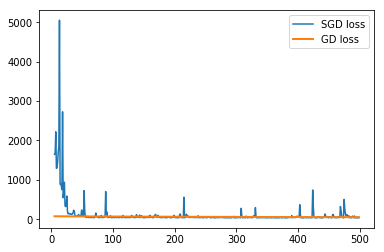

In [33]:
num_plot = 500
plt.plot(range(5,num_plot), sgd_loss_at_eachstep.reshape(-1)[5:num_plot], label="SGD loss")
plt.plot(range(5,num_plot), loss_at_eachstep[5:num_plot], linewidth=2, label= "GD loss")
plt.legend()
plt.show()

# Mini-batch SGD

In the vanilla SGD, each parameter $\mathbf{w}$ update is computed w.r.t one training sample randomly selected. In mini-batch SGD, the update is computed for a mini-batch (a small number of training samples), as opposed to a single example. The reason for this is twofold: 
* This reduces the variance in the parameter update and can lead to more stable convergence.
* This allows the computation to be more efficient, since our code is written in a vectorized way. 

A typical mini-batch size is $2^k$ (32, 256, etc), although the optimal size of the mini-batch can vary for different applications, and size of dataset (e.g., AlphaGo training uses mini-batch size of 2048 positions).

> Choose initial guess $\mathbf{w}_0$, step size (learning rate) $\eta$, <br>
batch size $n_B$, number of inner iterations $M\leq N/n_B$, number of epochs $n_E$ <br><br>
>    Set $\mathbf{w}_{M+1} = \mathbf{w}_0$ for epoch $e=0$<br>
>    For epoch $n=1,2, \cdots, n_E$<br>
>    &nbsp;&nbsp;&nbsp;&nbsp; $\mathbf{w}_{0}$ for the current epoch is $\mathbf{w}_{M+1}$ for the previous epoch.<br>
>    &nbsp;&nbsp;&nbsp;&nbsp; Randomly shuffle the training samples.<br>
>    &nbsp;&nbsp;&nbsp;&nbsp; For $m=0,1,2, \cdots, M$<br>
>    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    $\displaystyle\mathbf{w}_{m+1} = \mathbf{w}_m -  \frac{\eta}{n_B}\sum_{i=1}^{n_B} \nabla f_i(\mathbf{w}; \mathbf{x}^{(m+i)},y^{(m+i)})$

In [34]:
eta = 1e-6# step size (learning rate)
num_epochs = 500
n_B = 16 # number of mini-batch
M = int(len(y_train)/n_B)
w = np.array([30.24675099,  -0.11305592,   0.03011046,   0.04038072, 2.7844382 , -17.20263339,   4.4388352 ,  
              -0.00629636,  -1.44786537,   0.26242974,  -0.01064679,  -0.91545624, 0.01235133,  -0.50857142]) 
w += 2e-1*np.random.normal(size=np.shape(X_train)[1])  

sgdmini_loss_at_eachstep = np.zeros([num_epochs,M]) # record the change of the loss function

for e in range(num_epochs):
    shuffle_index = np.random.permutation(N)
    for m in range(M):
        i = shuffle_index[m:m+n_B]
        # indices for the gradient of loss function
        # of the i-th sample to be evaluated 
        sgdmini_loss_at_eachstep[e,m] = loss(w,X_train,y_train)
        dw = gradient_loss(w,X_train[i,:],y_train[i])
        w = w - eta * dw
        if m % 10 ==0 and e % 60 == 0:
            print("loss after", e+1, "epochs and ", m+1, "iterations is: ", loss(w,X_train,y_train))
            print("Training R squared after", e+1, "epochs and ", m+1, 
                  "iterations is:", cross_validate_rsquared(w, X_train, y_train))
            print("Testing R squared after", e+1, "epochs and ", m+1, 
                  "iterations is:", cross_validate_rsquared(w, X_test, y_test))

loss after 1 epochs and  1 iterations is:  1420.0987833295746
Training R squared after 1 epochs and  1 iterations is: -15.343033151837965
Testing R squared after 1 epochs and  1 iterations is: -19.752914794303525
loss after 1 epochs and  11 iterations is:  43.76081982914412
Training R squared after 1 epochs and  11 iterations is: 0.4999970011263003
Testing R squared after 1 epochs and  11 iterations is: 0.5485009790919042
loss after 1 epochs and  21 iterations is:  43.54661808303475
Training R squared after 1 epochs and  21 iterations is: 0.5024626648474175
Testing R squared after 1 epochs and  21 iterations is: 0.558228533741763
loss after 61 epochs and  1 iterations is:  32.97930433273371
Training R squared after 61 epochs and  1 iterations is: 0.6241026827667258
Testing R squared after 61 epochs and  1 iterations is: 0.5361439714618133
loss after 61 epochs and  11 iterations is:  37.34987100189008
Training R squared after 61 epochs and  11 iterations is: 0.5737930752142615
Testing R

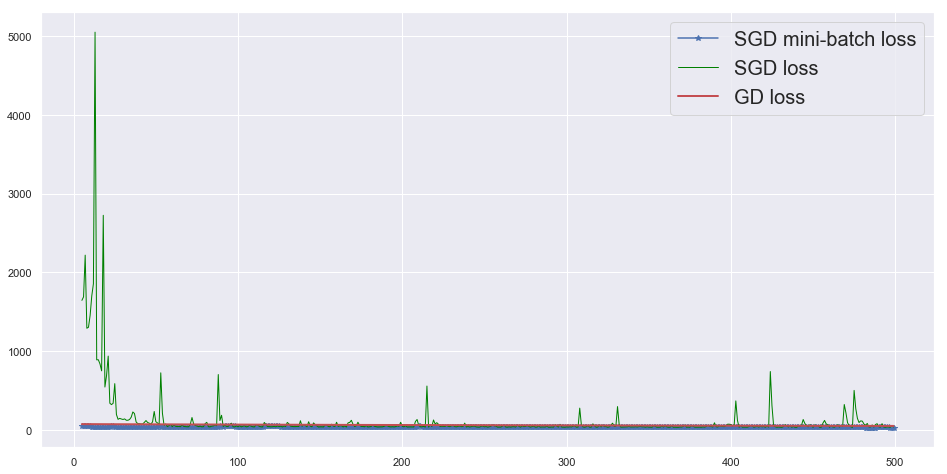

In [35]:
import seaborn as sns
sns.set()
num_plot = 500
plt.figure(figsize= [16,8])
plt.plot(range(5,num_plot), sgdmini_loss_at_eachstep.reshape(-1)[5:num_plot], 'b-*',
         label="SGD mini-batch loss")
plt.plot(range(5,num_plot), sgd_loss_at_eachstep.reshape(-1)[5:num_plot], 
         label="SGD loss", linewidth=1, color = 'green' )
plt.plot(range(5,num_plot), loss_at_eachstep[5:num_plot], 'r',
         linewidth=2, label= "GD loss")
plt.legend(fontsize=20)
plt.show()